In [5]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [11]:
import matplotlib.pyplot as plt
import numpy as np

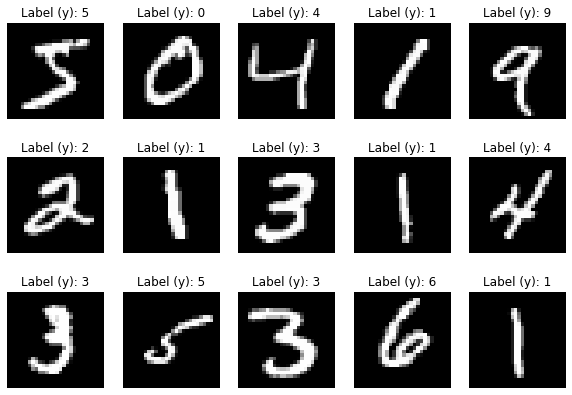

In [8]:
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

In [26]:
X_train = train_X.reshape(-1,28*28)
X_test = test_X.reshape(-1,28*28)

In [27]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
y_enc = (np.arange(np.max(train_y) + 1) == train_y[:, None]).astype(float)

print('one-hot encoding:\n', y_enc)

one-hot encoding:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [29]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [31]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

In [43]:
def fit(X, y, lr, c, epochs):
    m, n = X.shape
    w = np.random.random((n, c))
    b = np.random.random(c)
    losses = []
    
    # Loop
    for epoch in range(epochs):
        
        z = X@w + b
        prediction = softmax(z)
        # 원핫 인코딩
        y_hot = (np.arange(np.max(y) + 1) == train_y[:, None]).astype(float)
        
        # 그래디언트 계산
        w_grad = (1/m)*np.dot(X.T, (prediction - y_hot)) 
        b_grad = (1/m)*np.sum(prediction - y_hot)
        
        # 업데이트
        w = w - lr*w_grad
        b = b - lr*b_grad
        
        # loss계산
        # y = y.flatten()
        # loss = crossentropy(prediction, y)
        loss = -np.mean(np.log(prediction[np.arange(len(y)), y]))
        losses.append(loss)
        
        
        if epoch%100==0:
            print('Epoch {epoch}==> Loss = {loss}'
                  .format(epoch=epoch, loss=loss))
    return w, b, losses

In [33]:
X_train = X_train/255

In [44]:
w, b, loss = fit(X_train,train_y,lr=0.5, c=10, epochs=2000)

Epoch 0==> Loss = 5.344381872685891
Epoch 100==> Loss = 0.46986175020834436
Epoch 200==> Loss = 0.39962929246450196
Epoch 300==> Loss = 0.3693101396941341
Epoch 400==> Loss = 0.3512915843819237
Epoch 500==> Loss = 0.3389886443094206
Epoch 600==> Loss = 0.3298913685357846
Epoch 700==> Loss = 0.3228009211463076
Epoch 800==> Loss = 0.3170630521690766
Epoch 900==> Loss = 0.3122872887244031
Epoch 1000==> Loss = 0.3082247967765927
Epoch 1100==> Loss = 0.30470873344438637
Epoch 1200==> Loss = 0.30162256299422835
Epoch 1300==> Loss = 0.29888210200258675
Epoch 1400==> Loss = 0.2964248008426552
Epoch 1500==> Loss = 0.2942030620303916
Epoch 1600==> Loss = 0.2921799189253931
Epoch 1700==> Loss = 0.29032615073744594
Epoch 1800==> Loss = 0.288618302263229
Epoch 1900==> Loss = 0.28703729104215286


In [45]:
def predict(X,w,b):
    z = X@w + b
    prediction = softmax(z)
    return np.argmax(prediction, axis=1)

In [46]:
def acc(y,prediction):
    return np.sum(y==prediction)/len(y)

In [47]:
train_preds = predict(X_train, w, b)
acc(train_y, train_preds)

0.9209666666666667

In [48]:
X_test = test_X.reshape(-1,28*28)
X_test= X_test/255
test_preds = predict(X_test,w,b)
acc(test_y,test_preds)

0.9191